# Diabetes Risk Prediction

## EDA

Basic dataset overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

print(df.shape)
print(df.info())
display(df.head())

(100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Check missing values

In [3]:
# Missing values count
print(df.isnull().sum())

# Percentage of missing values
print((df.isnull().sum() / len(df)) * 100)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64


Target variable balance

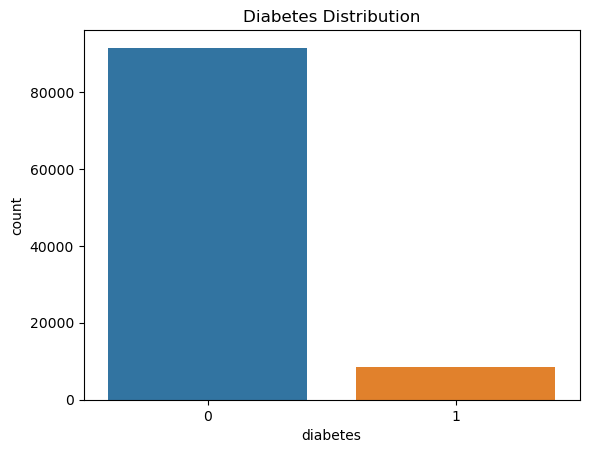

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


In [4]:
# Visualize the target variable distribution
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

print(df['diabetes'].value_counts(normalize=True))

The number of patients without diabetes is much larger than those with diabetes. This **imbalance** can cause problems:
- Bias towards majority class
- Poor sensitivity/recall
- Misleading accuracy

Summary statistics

In [5]:
# Numeric summary
display(df.describe())

# Categorical summary
display(df.describe(include='object'))

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


Explore numeric features

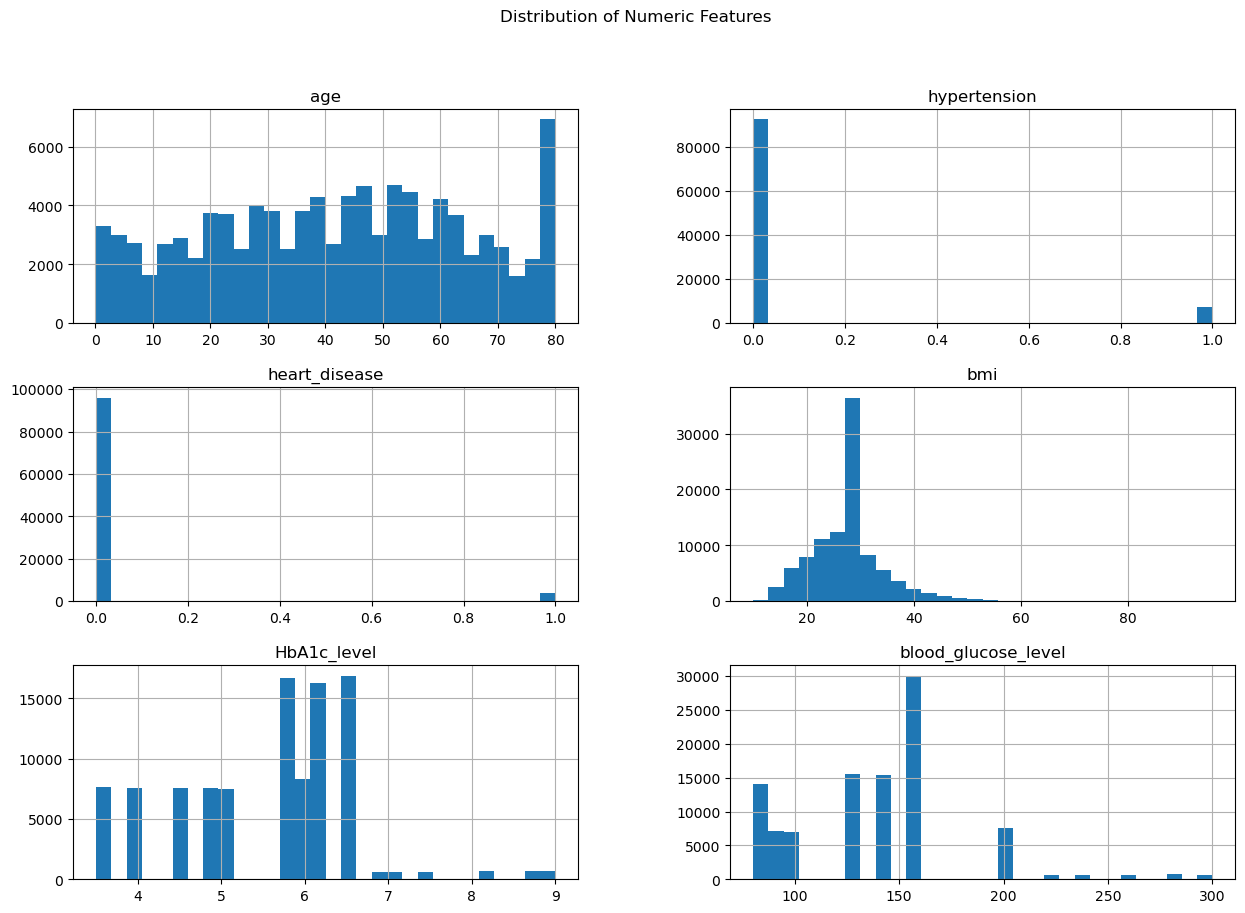

In [6]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('diabetes')

# Histograms
df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

Explore categorical features

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['gender', 'smoking_history'], dtype='object')


In [8]:
# Ensure diabetes is categorical (not int64)
df["diabetes"] = df["diabetes"].astype(str)

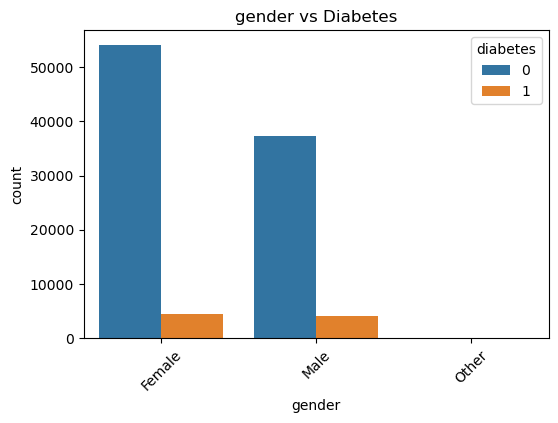

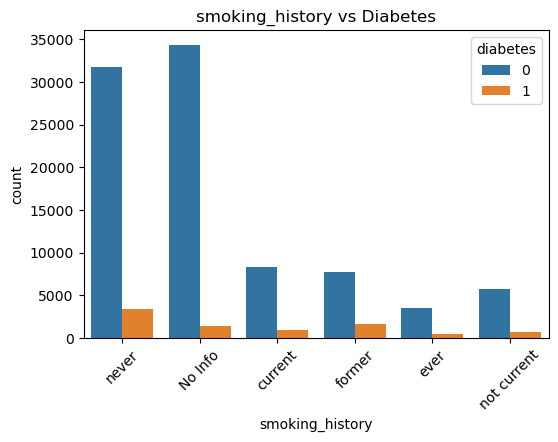

In [9]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, hue='diabetes')
    plt.title(f'{col} vs Diabetes')
    plt.xticks(rotation=45)
    plt.show()

Correlation & feature relationships

In [10]:
# Convert back to int
df["diabetes"] = df["diabetes"].astype(int)

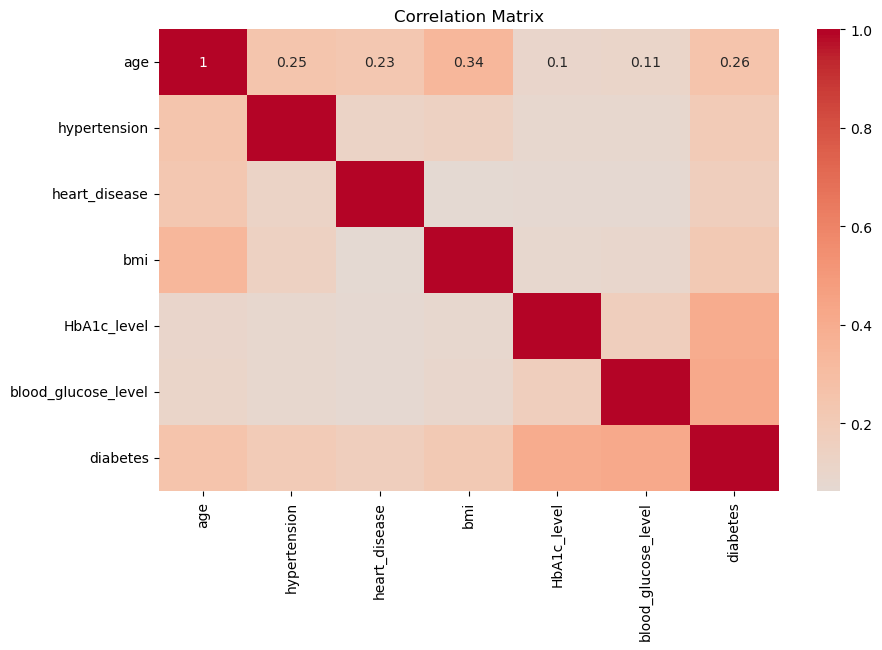

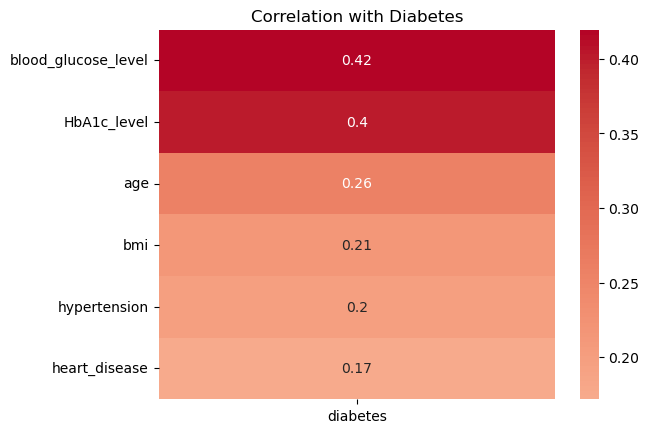

In [11]:
# Create a correlation matrix
plt.figure(figsize=(10,6))
corr_num = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[corr_num].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Correlation with target variable
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, center=0)
plt.title('Correlation with Diabetes')
plt.show()

**Age** had moderate positive correlation with diabetes (0.26)
- Older individuals are more likely to have diabetes.

**HbAIc_level** (0.4) and **blood_glucose_level** (0.42) have the strongest correlations with diabetes.
- These are clinically expected, since both are direct measures of glucose control.

**BMI** (0.21) shows a weaker correlation (0.21), but still relevant.
- Suggests obesity contributes, but not as strongly as direct glucose markers.

**Hypertension** (0.21) and **heart_disease** (0.17) show mild correlations.
- These are comorbidities often linked to diabetes, but they don't directly determine diagnosis.

Diabetes vs. numerical features

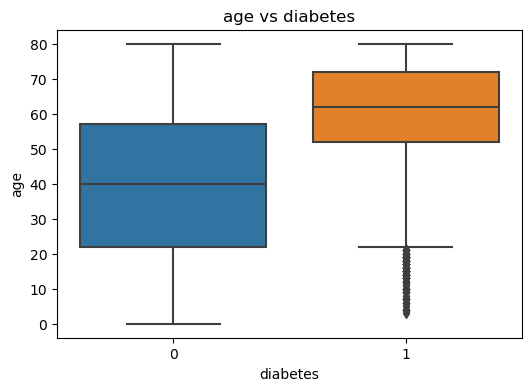

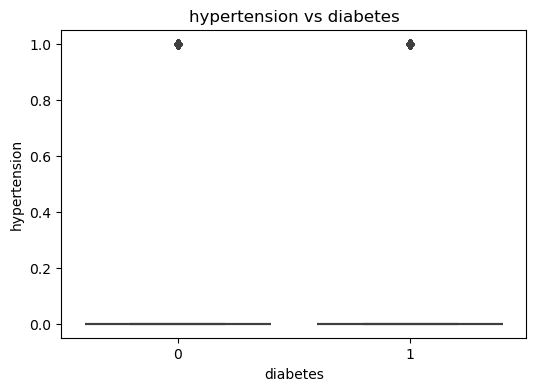

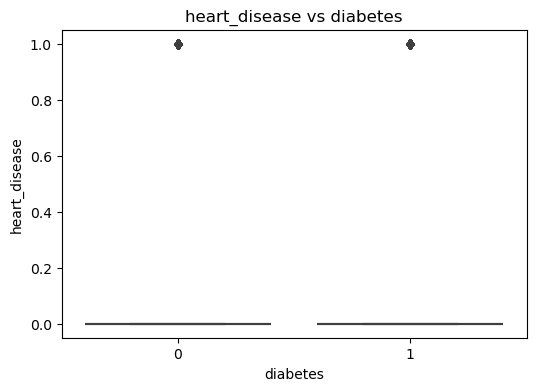

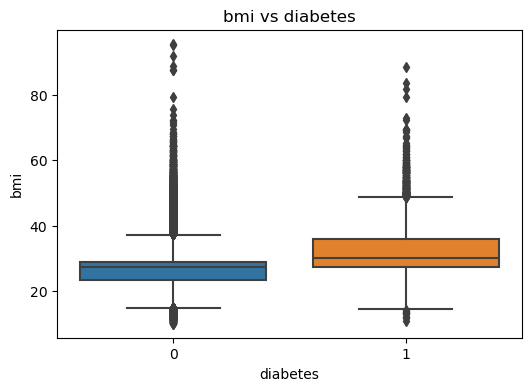

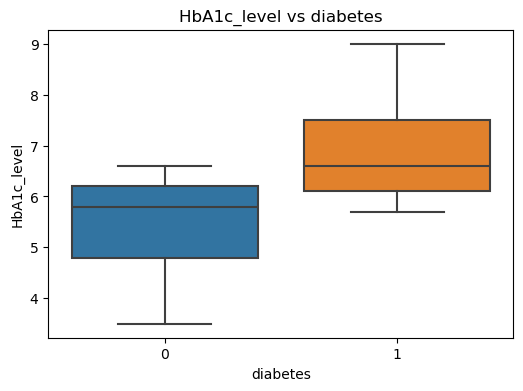

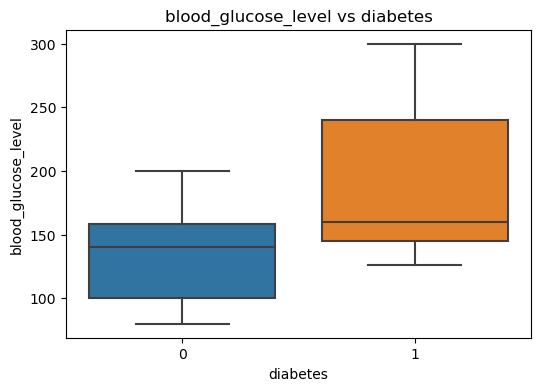

In [12]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='diabetes', y=col, data=df)
    plt.title(f'{col} vs diabetes')
    plt.show()

## Data Processing

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Split data into training and test sets

In [14]:
# features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Define preprocessor (scaling numerics + one-hot encoding categoricals)

In [15]:
# Categorical and numerical columns
categorical_cols = ['gender', 'smoking_history']
numeric_cols = X.drop(columns=categorical_cols).columns

# Preprocessor: numerical - StandardScaler, categorical - OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

## Modeling 

#### What SMOTE Does

SMOTE addresses the target variable **imbalance** by synthetically generating new minority class samples rather than just duplicating existing ones. It works by:

- Taking a minority class instance (a patient with diabetes).
- Finding its nearest neighbors in feature space.
- Creating new, synthetic samples along the line segments joining the patient to its neighbors.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

In [17]:
# Logistic Regression with SMOTE
log_reg_smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

log_reg_smote.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
# Random Forest with SMOTE
rf_smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=200))
])

rf_smote.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
# XGBoost with SMOTE
xgb_smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_smote.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Evaluation

Since this is a diabetes risk prediction problem, we don’t just want accuracy. More important metrics are:

- Precision: Of the patients predicted to have diabetes, how many really do?

- Recall (Sensitivity): Of the patients who actually have diabetes, how many did the model catch? (Very important to avoid false negatives.)

- F1-score: Balance between precision and recall.

- ROC-AUC: Overall ability to separate positive vs. negative cases.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [22]:
models = {
    "Logistic Regression": log_reg_smote,
    "Random Forest": rf_smote,
    "XGBoost": xgb_smote
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print()
    
    # Save results for comparison later
    results[name] = {
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba)
    }

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.43      0.89      0.58      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000

ROC-AUC: 0.9629904693024752

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.74      0.75      0.75      1700

    accuracy                           0.96     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.96      0.96      0.96     20000

ROC-AUC: 0.9653400835744136

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.91      0.71      0.80      1700

    accuracy                           0.97     20000
   m

### Logistic Regression
- Precision (class 1 / diabetes): 0.43 → Less than half of patients flagged as diabetic truly have diabetes. Many false positives.
- ecall (class 1): 0.89 → Very strong! It caught 89% of actual diabetes cases.
- F1 (class 1): 0.58 → Low because of the tradeoff: recall is high, but precision is weak.
- ROC-AUC: 0.963 → Excellent separation ability.

👉 Takeaway: Logistic regression is **very sensitive** (catches most diabetes cases), but **not very specific** (lots of false alarms). This could be acceptable for screening tests where catching almost everyone at risk is the priority.

### Random Forest
- Precision (class 1): 0.74 → Strong, about 3 out of 4 flagged cases truly have diabetes.
- Recall (class 1): 0.75 → It finds about three-quarters of actual diabetes cases.
- F1 (class 1): 0.75 → Balanced.
- Accuracy: 96%, ROC-AUC: 0.965 → High overall performance.

👉 Takeaway: Random Forest achieves a **good balance** between precision and recall. It misses some cases compared to logistic regression, but it also reduces false alarms substantially. This makes it well-suited for a **diagnostic support tool** where balance is key.

### XGBoost
- Precision (class 1): 0.91 → Very strong! When it predicts diabetes, it’s almost always correct.
- Recall (class 1): 0.71 → Weaker than logistic regression and random forest — it misses nearly 30% of true diabetes cases.
- F1 (class 1): 0.80 → Solid because precision is high.
- Accuracy: 97%, ROC-AUC: 0.976 → Best overall separation power among the three.

👉 Takeaway: XGBoost is **highly precise** but **less sensitive**. This means it minimizes false positives but at the cost of missing more true cases. In a healthcare context, this might be acceptable for *confirmatory diagnosis* but not for screening, since false negatives are risky.

Confusion Matrics

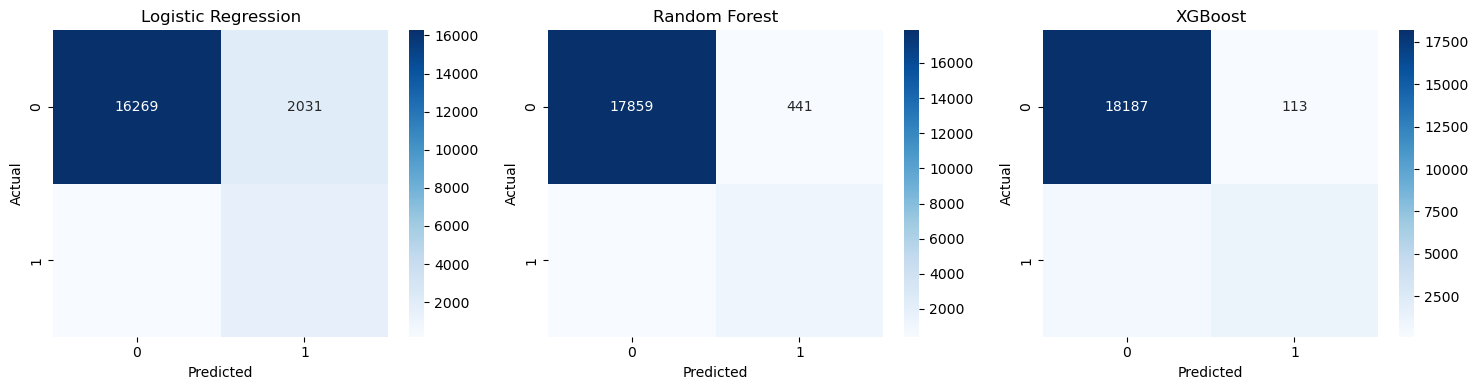

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, res) in zip(axes, results.items()):
    sns.heatmap(res["confusion_matrix"], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()


ROC Curves

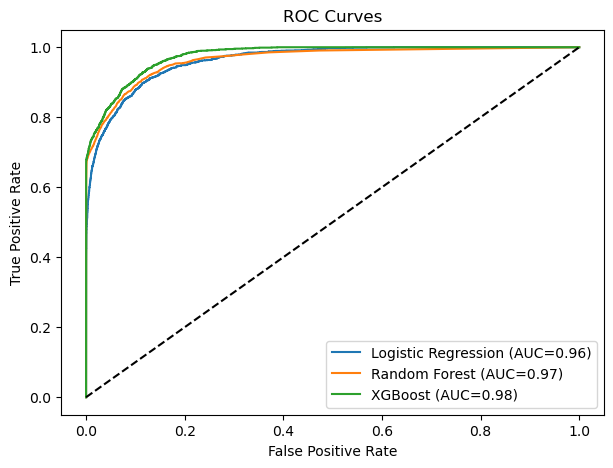

In [24]:
plt.figure(figsize=(7, 5))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

### 🏥 Clinical Framing

If the goal is screening (catching as many diabetes cases as possible): Logistic Regression is most suitable.

If the goal is a balanced tool (good recall + good precision): Random Forest is appropriate.

If your goal is high certainty when flagging diabetes (few false positives): XGBoost is best.

## Feature Importance

Logistic Regression (coefficients)

In [25]:
# Get feature names from preprocessor
feature_names = preprocessor.get_feature_names_out()

# Extract coefficients from logistic regression
coef = log_reg_smote.named_steps['classifier'].coef_[0]

# Put into a DataFrame
lr_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef,
    'Abs_Coefficient': abs(coef)
}).sort_values(by='Abs_Coefficient', ascending=False)

print(lr_importance.head(10))

                         Feature  Coefficient  Abs_Coefficient
4               num__HbA1c_level     2.392795         2.392795
5       num__blood_glucose_level     1.303938         1.303938
0                       num__age     1.160859         1.160859
6             cat__gender_Female    -0.973218         0.973218
9   cat__smoking_history_No Info    -0.825503         0.825503
7               cat__gender_Male    -0.670078         0.670078
3                       num__bmi     0.645662         0.645662
13    cat__smoking_history_never    -0.236614         0.236614
1              num__hypertension     0.206984         0.206984
12   cat__smoking_history_former    -0.199870         0.199870


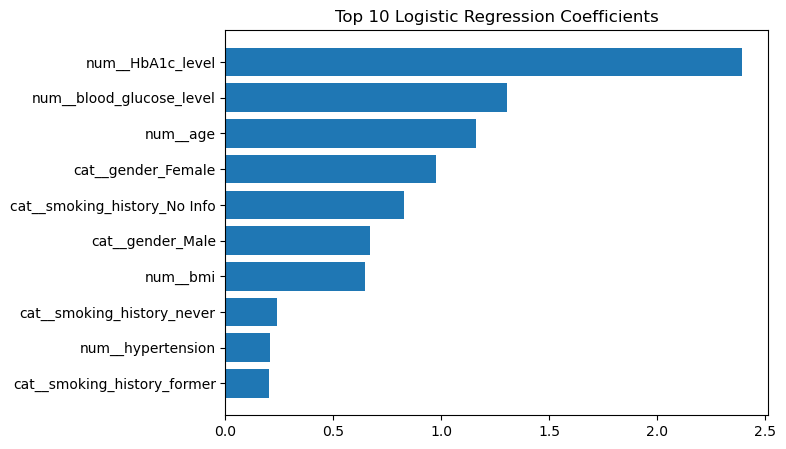

In [30]:
plt.figure(figsize=(7,5))
plt.barh(lr_importance["Feature"].head(10), lr_importance["Abs_Coefficient"].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Logistic Regression Coefficients")
plt.show()

Random Forest (feature importance by splits)

In [26]:
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_smote.named_steps['classifier'].feature_importances_  
}).sort_values(by='Importance', ascending=False)

print(rf_importance.head(10))

                         Feature  Importance
4               num__HbA1c_level    0.366808
5       num__blood_glucose_level    0.279336
0                       num__age    0.176911
3                       num__bmi    0.110586
1              num__hypertension    0.023414
2             num__heart_disease    0.012024
9   cat__smoking_history_No Info    0.011869
12   cat__smoking_history_former    0.005078
13    cat__smoking_history_never    0.002994
7               cat__gender_Male    0.002599


XGBoost (feature importance by gain)

- XGBoost supports multiple types of importance (weight, gain, cover)
- Gain (information gain when a feature is used in splits) is most meaningful.

In [27]:
xgb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_smote.named_steps['classifier'].feature_importances_
}).sort_values(by='Importance', ascending=False)

print(xgb_importance.head(10))

                         Feature  Importance
4               num__HbA1c_level    0.474326
5       num__blood_glucose_level    0.297347
0                       num__age    0.054860
9   cat__smoking_history_No Info    0.035379
2             num__heart_disease    0.033719
1              num__hypertension    0.030690
3                       num__bmi    0.020519
7               cat__gender_Male    0.016958
13    cat__smoking_history_never    0.007128
11     cat__smoking_history_ever    0.006748


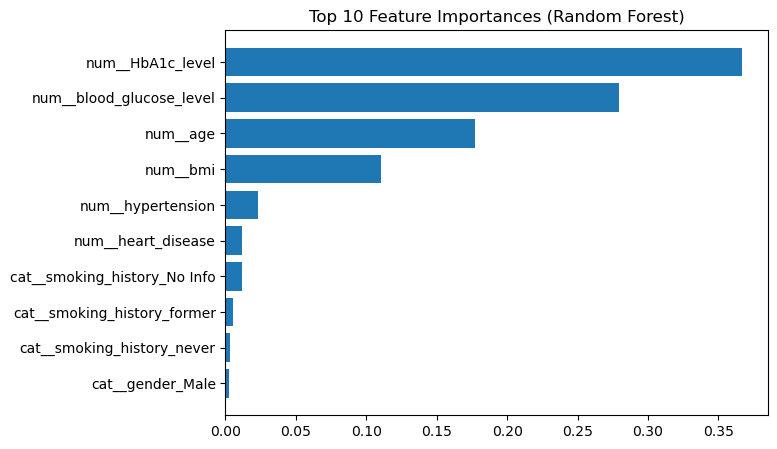

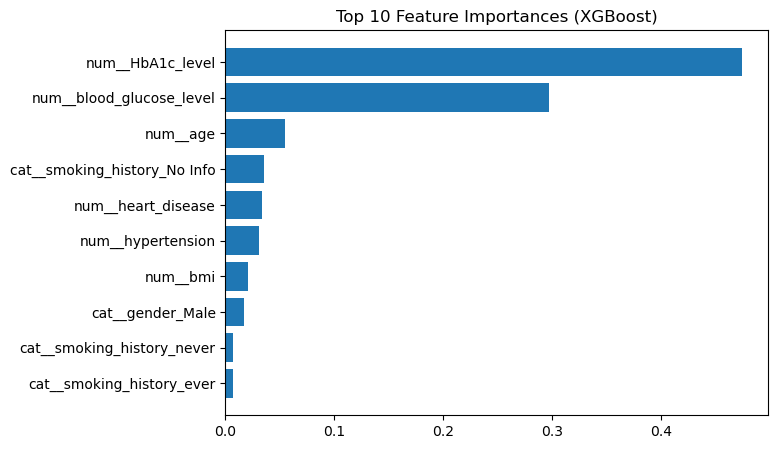

In [28]:
def plot_importance(df, model_name, top_n=10):
    plt.figure(figsize=(7,5))
    plt.barh(df["Feature"].head(top_n), df["Importance"].head(top_n))
    plt.gca().invert_yaxis()
    plt.title(f"Top {top_n} Feature Importances ({model_name})")
    plt.show()

plot_importance(rf_importance, "Random Forest")
plot_importance(xgb_importance, "XGBoost")

### 📌 
- Logistic Regression → interpretable effect direction (+/- on diabetes risk).
- Random Forest & XGBoost → ranked importance, useful for screening feature relevance.

## Future Improvements

**1. Threshold Optimization for Clinical Use**

- Instead of a fixed threshold (0.5), optimize thresholds for different use cases:

- Screening → lower threshold to maximize recall (catch more diabetes cases).

- Diagnosis support → higher threshold to maximize precision (reduce false alarms).

**2. Model Explainability (SHAP/LIME)**

- Use SHAP values or LIME to explain individual predictions.

- Clinicians can see why the model flagged a patient as high risk (e.g., high BMI + high sugar intake).

**3. Cross-Validation**

- Use stratified k-fold cross-validation to validate model robustness instead of just one train-test split.